# COGS 108 - Final Project (Relationship between state economic development and vaccine coverage)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

In this project, we hope to investigate if each state’s economy effectively contributes to the spread of COVID-19. We are going to search, collect, and examine the set of data which contain information about the number of people vaccinated for each state, which we will use to determine the proportion of people vaccinated per state and the rate of increase in the vaccinated population per state, and the GDP and personal income since each state's economy varies. Data will be collected mainly through CDC and public government sites for accurate information. Using population as a confounding variable, we explored the relationships between different measures of the state's economy and the vaccination coverage rates and the increase rate of vaccinated population. Through linear regression, we found correlation between vaccination rates and individual income, and a positive correlation between vaccination population growth and individual income. It suggests that there may be a positive relationship between vaccine coverage and a state's economy.

# Names

- Jianfan Huo
- Yunhao Du
- Yixin Jiang
- Yixiao An
- Celine Zhao

<a id='research_question'></a>
# Research Question

Is there a positive relationship between state economic development and vaccine coverage？

<a id='background'></a>

## Background & Prior Work

The COVID-19 epidemic is a huge challenge that the whole world is facing together. On January 10-12, 2020, the WTO published documents about how the novel coronavirus(COVID-19) can has high transmission and infection rate, and also guiding people how to manage with this disease[1]. From the beginning of 2020 until now, COVID-19 is still continue affecting people’s live all over the world. The United States also implemented city lockdown and social distancing restriction during the pandemic to try to reduce the spread and impact of COVID-19. Although COVID-19 virus have not be eliminated today, the COVID-19 vaccine was produced and approved to use. "Since Dec. 11, 2020, the Pfizer-BioNTech COVID-19 Vaccine has been available under EUA in individuals 16 years of age and older " (U. S. Food and Drug Administration, 2021)[2]. However, the rate of COVID-19 vaccination coverage has not reaching 100% in U.S.. CDC indicates that the national rate of fully vaccination coverage is approximately 58.5% by November 9, 2021, and only 67.5% people have completed at least one dose[3].

Data from the New York Times shows that each state has a different completion rate for COVID-19 vaccine, with vaccination coverage rates ranging from 87% to 36%[4]. Based on the statement from FDA, it is known that people can have COVID-19 vaccine for free in U.S.[5]. At March 5, 2021, Pew Research Center reports that in U.S., 14% of low-income adults reported that they had received at least one dose of the vaccine, compared with 20% of middle-income adults and 27% of high-income adults [6]. The rate of vaccination coverage meant to be thought-provoking. Does each state of the economy has an impact on COVID-19 vaccination rate? If there is an impact, what is the relationship between state economy and vaccination rates?

References (include links):
- 1) https://www.who.int/emergencies/diseases/novel-coronavirus-2019/interactive-timeline#!
- 2) https://covid.cdc.gov/covid-data-tracker/#vaccinations_vacc-total-admin-rate-total  
- 3) https://www.fda.gov/news-events/press-announcements/fda-approves-first-covid-19-vaccine 
- 4) https://www.nytimes.com/interactive/2020/us/covid-19-vaccine-doses.html 
- 5) https://www.fda.gov/consumers/consumer-updates/learn-more-about-covid-19-vaccines-fda#:~:text=FDA%2Dauthorized%20COVID%2D,or%20after%20your%20appointment. 
- 6) https://www.pewresearch.org/science/2021/03/05/growing-share-of-americans-say-they-plan-to-get-a-covid-19-vaccine-or-already-have/

# Hypothesis

The vaccine coverage will have positive effect on economy.

# Dataset(s)

1.
•	Dataset Name: COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv

•	Link to the dataset: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc

•	Number of observations: 21208

•	This dataset contains information about the number of people vaccinated with various vaccines in each state. We will use this dataset to analyze vaccination rates in different states.

2.

•	Dataset Name: GDP and Personal Income

•	Link to the dataset: https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1

•	Number of observations: 59

•	This dataset contains the sum of each state's per capita income in the second quarter of 2021. We will use this dataset to analyze the state per capita income and vaccination.

3.

•	Dataset Name: GDP and Personal Income

•	Link to the dataset: https://apps.bea.gov/itable/iTable.cfm?ReqID=70&step=1

•	Number of observations: 50

•	This dataset contains full names and abbreviations of all 50 states. We're going to use this data to abbreviate all of our state names.

4.

•	Dataset Name: List of All 50 US State Abbreviations

•	Link to the dataset: https://abbreviations.yourdictionary.com/articles/state-abbrev.html 

•	Number of observations: 51

•	This dataset contains the state abbreviations. And we will use this dataset to rename all the states name as abbreviations.

5.

•	Dataset Name: US States - Ranked by Population 2021

•	Link to the dataset: https://worldpopulationreview.com/states

•	Number of observations: 51

•	This dataset contains the population of each state in America. We will use this dataset to calculate the vaccination rates per state with the vaccinated population of the state.

# Setup

In [1]:
## YOUR CODE HERE
## YOUR CODE HERE
# import dataframes
import pandas as pd

# import number manipulation
import numpy as np 

# import data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import Statmodels & patsy
import patsy
import statsmodels.api as sm

In [2]:
df_vaccine = pd.read_csv('Data/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
df_population = pd.read_csv('Data/Population.csv')
df_income = pd.read_csv('Data/net_income.csv')
df_GDP = pd.read_csv('Data/states_GDP.csv')

# Data Cleaning
As we searched, collected, and examined the data, we found that not all of the data set are what we needed for our research topics. We need to pick out the data we need and sort and rename them. From the dataset of COVID-19_Vaccinations_in_the_United_States_Jurisdiction, we extracted the number of vaccinations by state. From the datasets of population, net_income, and states_GDP, we extracted the population of each state, their per capita income, and their GDP.

### Steps taken to clean the data：
#### df_vaccine:
   1. Extract the number of vaccinations by state stored as the dataset named df_vaccine.
   2. Only keep the data with 'Date' from "4/01/2021" to "6/30/2021" and delete all the other in df_vaccine.
   3. Change the unit of data to thousands and rename all columns in df_vaccine
    
#### df_population, df_income, df_gdp:
   4. Extract the population of each state stored as the dataset named df_population, rename the state, and remove excess data.
   5. Extract the income of each state stored as the dataset named df_income, rename the state, and remove excess data.
   6. Extract the GDP of each state stored as the dataset named df_gdp, rename the state, and remove excess data.
    
#### df_econ:
   7. Combine the df_population, df_income, and df_GDP together into the dataset df_econ
    
#### df:
   8. Calculate the total number of vaccinated people between 04/01/2021 and 06/30/2021 for each states. 
      Calculate the vaccination coverage rates for each states. 
      Calculate the rate of increase in the vaccinated population. 
      Add all these result into df_econ and rename df_econ to df. 

## 1. Extract the number of vaccinations by state stored as the dataset named df_vaccine.
Our goal was to analyze whether state economies contributed to the spread of vaccines. The data we need here is the number of vaccinations in 2021 for each region. So, the data we need here is Date, Location, Series_Complete_Yes, Series_Complete_Janssen, Series_Complete_Moderna, Series_Complete_Pfizer, and	Series_Complete_Unk_Manuf

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
df_vaccine = df_vaccine[['Date', 
                         'Location', 
                         'Series_Complete_Yes', 
                         'Series_Complete_Janssen', 
                         'Series_Complete_Moderna',
                         'Series_Complete_Pfizer',
                         'Series_Complete_Unk_Manuf']]

In [4]:
df_vaccine.head(5)

,Date,Location,Series_Complete_Yes,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf
0,11/05/2021,SC,2587217,185786,957836,1443294,301
1,11/05/2021,OR,2661407,228418,950422,1481340,1227
2,11/05/2021,IN,3365638,259526,1196470,1902099,7543
3,11/05/2021,NY,13038415,1127875,4619753,7287968,2819
4,11/05/2021,WI,3409332,276848,1264326,1867685,473


## 2. Only keep the data with 'Date' from "4/01/2021" to "6/30/2021" and delete all the other in df_vaccine.
Current official state personal income data are only available through the first two quarters of 2021, so we need to filter our data again. Because universal vaccination began in March, it didn't widely spread until April. So we decided to use data from the second quarter(April-June) to analyze the impact of each state's economy on vaccination penetration. In this step, we only keep the data with 'Date' from "4/01/2021" to "6/30/2021" and delete all the other.

In [5]:
# Check the type of each data in the dataset 
df_vaccine.dtypes

Date                         object
Location                     object
Series_Complete_Yes           int64
Series_Complete_Janssen       int64
Series_Complete_Moderna       int64
Series_Complete_Pfizer        int64
Series_Complete_Unk_Manuf     int64
dtype: object

In [6]:
# Keep the data with 'Date' from "4/01/2021" to "6/30/2021" and delete all the other.
start = "04/01/2021"
end = "06/30/2021"

df_vaccine = df_vaccine[(df_vaccine['Date'][:] == start ) | (df_vaccine['Date'][:] == end)]

In [7]:
df_vaccine.reset_index(drop=True)
df_vaccine

,Date,Location,Series_Complete_Yes,Series_Complete_Janssen,Series_Complete_Moderna,Series_Complete_Pfizer,Series_Complete_Unk_Manuf
8305,06/30/2021,ME,819500,103312,327721,388364,103
8306,06/30/2021,UT,1196468,119014,456194,621258,2
8307,06/30/2021,PA,6345433,537395,2503367,3304347,324
8308,06/30/2021,GU,89574,4314,32664,52596,0
8309,06/30/2021,NY,10508196,894628,4043410,5569076,1082
...,...,...,...,...,...,...,...
14215,04/01/2021,NH,247295,16199,129723,101367,6
14216,04/01/2021,KY,798150,45857,358920,393257,116
14217,04/01/2021,NY,3362056,214142,1434622,1713049,243
14218,04/01/2021,SC,792963,49667,267357,475736,203


## 3. Change the unit of data to thousands and rename all columns in df_vaccine
Change the unit of data in df_vaccine to thousands and round the value up. <br>
Renaming all columns with unclear name, sorting all data by date and location, and only keeping the data for 51 states.

In [ ]:
# 这个不用在conclusion里面说

In [8]:
# Renaming all unclear columns
df_vaccine = df_vaccine.rename(columns = {'Series_Complete_Yes':'Num of Vaccinated People in thousand',
                        'Series_Complete_Janssen':'Num of Vaccinated People with Janssen in thousand',
                         'Series_Complete_Moderna':'Num of Vaccinated People with Moderna in thousand',
                         'Series_Complete_Pfizer':'Num of Vaccinated People with Pfizer in thousand',
                         'Series_Complete_Unk_Manuf':'Num of Vaccinated People with Unknown Manuf'
                        })

In [9]:
# Sorting all data by date and location
df_vaccine = df_vaccine.sort_values(["Date", "Location"], ascending = (True, True))
df_vaccine = df_vaccine.reset_index(drop=True)

In [10]:
# Only keeping the data for 51 states
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID',
          'IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
          'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA',
          'RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df_vaccine = df_vaccine[(df_vaccine['Location'][:].isin(states))]
df_vaccine = df_vaccine.reset_index(drop = True)

In [11]:
# Change the unit of data and round the value up
df_vaccine['Num of Vaccinated People in thousand'] = (df_vaccine['Num of Vaccinated People in thousand'] / 1000).round(2)
df_vaccine['Num of Vaccinated People with Janssen in thousand'] = (df_vaccine['Num of Vaccinated People with Janssen in thousand']/1000).round(2)
df_vaccine['Num of Vaccinated People with Moderna in thousand'] = (df_vaccine['Num of Vaccinated People with Moderna in thousand']/1000).round(2)
df_vaccine['Num of Vaccinated People with Pfizer in thousand'] = (df_vaccine['Num of Vaccinated People with Pfizer in thousand']/1000).round(2)
df_vaccine.head(5)

,Date,Location,Num of Vaccinated People in thousand,Num of Vaccinated People with Janssen in thousand,Num of Vaccinated People with Moderna in thousand,Num of Vaccinated People with Pfizer in thousand,Num of Vaccinated People with Unknown Manuf
0,04/01/2021,AK,165.32,5.69,71.94,87.68,10
1,04/01/2021,AL,673.77,42.96,314.53,316.25,35
2,04/01/2021,AR,432.74,27.50,204.41,200.77,57
3,04/01/2021,AZ,1267.48,48.30,543.86,674.79,526
4,04/01/2021,CA,6485.63,368.03,2823.85,3293.46,280


## 4. Extract the population of each state stored as the dataset named df_population, rename the state, and remove excess data.
We will get population data and remove excess data.

In [12]:
df_population.head(5)

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,1,California,39613493,0.0038,39461588,37319502,0.0615,0.1184,254.2929
1,2,Texas,29730311,0.0385,28628666,25241971,0.1778,0.0889,113.8081
2,3,Florida,21944577,0.0330,21244317,18845537,0.1644,0.0656,409.2229
3,4,New York,19299981,-0.0118,19530351,19399878,-0.0051,0.0577,409.5400
4,5,Pennsylvania,12804123,0.0003,12800922,12711160,0.0073,0.0383,286.1704


In [13]:
df_population = df_population.drop(30)
df_population = df_population.iloc[: , 1:3]

In [14]:
df_population = df_population.sort_values(['State'], ascending = True)
df_population = df_population.reset_index(drop = True)

In [15]:
df_population['State'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID',
              'IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT',
              'NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
              'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df_population = df_population.sort_values(['State'], ascending = True)

In [16]:
df_population = df_population.rename(columns = {'Pop':'Population'})
df_population = df_population.reset_index(drop = True)
df_population.head()

,State,Population
0,AK,724357
1,AL,4934193
2,AR,3033946
3,AZ,7520103
4,CA,39613493


## 5. Extract the income of each state stored as the dataset named df_income, rename the state, and remove excess data.
In this step, we need to rearrange personal income and GDP data for each state. We deleted the geographic information (GeoFips) for each state. Since our data only analyzed personal income and GDP data for the second quarter of 2021, we also removed personal income and GDP data for the first quarter of 2021.

In [17]:
df_income.head(5)

,GeoFips,GeoName,2021:Q1,2021:Q2
0,0,United States,66191,62215
1,1000,Alabama,52633,48133
2,2000,Alaska *,69683,65501
3,4000,Arizona,54620,50373
4,5000,Arkansas,53643,49079


In [18]:
df_income = df_income[['GeoName','2021:Q2']]
df_income.columns = ['State', 'Personal_Income']

In [19]:
df_income = df_income.iloc[:52 , :]
df_income = df_income.iloc[1: , :]

In [20]:
df_income['State'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID',
              'IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT',
              'NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
              'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df_income = df_income.sort_values(['State'], ascending = True)

In [21]:
df_income = df_income.reset_index(drop = True)
df_income.head(5)

,State,Personal_Income
0,AK,65501
1,AL,48133
2,AR,49079
3,AZ,50373
4,CA,74304


## 6. Extract the GDP of each state stored as the dataset named df_gdp, rename the state, and remove excess data.
Abbreviate the full name of each state(include the DC) and drop the dataset which is not the state.


In [22]:
df_GDP.head(5)

,GeoFips,GeoName,2021:Q1,2021:Q2
0,0,United States *,22038226.0,22740959.0
1,1000,Alabama,237303.0,243554.6
2,2000,Alaska,52373.8,54020.3
3,4000,Arizona,388598.8,400155.7
4,5000,Arkansas,139172.7,143438.4


In [23]:
df_GDP = df_GDP[['GeoName','2021:Q2']]
df_GDP.columns = ['State', 'GDP']

In [24]:
df_GDP = df_GDP.iloc[:52 , :]
df_GDP = df_GDP.iloc[1: , :]

In [25]:
df_GDP['State'] = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID',
              'IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT',
              'NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',
              'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
df_GDP = df_GDP.sort_values(['State'], ascending = True)

In [26]:
df_GDP = df_GDP.reset_index(drop = True)
df_GDP.head(5)

,State,GDP
0,AK,54020.3
1,AL,243554.6
2,AR,143438.4
3,AZ,400155.7
4,CA,3290169.6


## 7. Extract the GDP of each state stored as the dataset named df_gdp, rename the state, and remove excess data.
Combine the df_population, df_income, and df_GDP together into the dataset df_econ. <br>
Change the unit of data in df_econ and round the value up. 

In [27]:
# Combine the df_GDP and df_income together
df_income['GDP'] = df_GDP['GDP']
df_econ = df_income
df_econ.head()

,State,Personal_Income,GDP
0,AK,65501,54020.3
1,AL,48133,243554.6
2,AR,49079,143438.4
3,AZ,50373,400155.7
4,CA,74304,3290169.6


In [28]:
# Add the column Population of df_population into df_econ
df_econ["Population"] = df_population['Population']

In [29]:
# Change the unit of data and round the value up
df_econ['Personal_Income'] = (df_econ['Personal_Income']/1000).round(2)
df_econ['GDP'] = (df_econ['GDP']/1000).round(2)
df_econ['Population'] = (df_econ['Population']/1000).round(2)

In [30]:
df_econ = df_econ.rename(columns = {'Personal_Income':'Personal_Income in thousand',
                        'GDP':'GDP in thousand',
                         'Population':'Population in thousand'
                        })
df_econ.head(5)

,State,Personal_Income in thousand,GDP in thousand,Population in thousand
0,AK,65.50,54.02,724.36
1,AL,48.13,243.55,4934.19
2,AR,49.08,143.44,3033.95
3,AZ,50.37,400.16,7520.10
4,CA,74.30,3290.17,39613.49


## 8. Calculate and get the final dataset df.
Calculate the total number of vaccinated people between 04/01/2021 and 06/30/2021 for each states.<br>
Calculate the vaccination coverage rates for each states. <br>
Calculate the rate of increase in the vaccinated population.

In [31]:
# Define a function sum_vaccinated to get the total number of vacciated people for an input state
def sum_vaccinated(state):
    sum_start = df_vaccine[(df_vaccine['Date'][:] == "04/01/2021") & (df_vaccine['Location'][:] == state)]['Num of Vaccinated People in thousand']
    sum_end = df_vaccine[(df_vaccine['Date'][:] == "06/30/2021") & (df_vaccine['Location'][:] == state)]['Num of Vaccinated People in thousand']
    return (sum_end.values[0] - sum_start.values[0])

In [32]:
# Get the total number of vaccinated people for each states
vaccinated_quarter = df_vaccine['Location'].apply(sum_vaccinated)

In [33]:
# Add the data into df as a new column
df = df_econ
df['Total Vaccinated in thousand'] = vaccinated_quarter[:52]

In [34]:
# Calculate the vaccination rate for each state and add the data into df as a new column
df['Vaccination rate'] = (df['Total Vaccinated in thousand']/df['Population in thousand']).round(4)

In [35]:
# Get the number of vaccinated people in 04/01/2021 and the total number of vaccination people in this quarter
sum_start = df_vaccine[df_vaccine['Date'] == "04/01/2021"]['Num of Vaccinated People in thousand']
change = df['Total Vaccinated in thousand'] 

In [36]:
# Calculate the increase rate in vaccinnated population for each states
rate_increase = (change/sum_start).round(4)

In [37]:
# Add the data into df as a new column
df['Increase rate in vaccinated population'] = rate_increase

### Finally, we get a clear and clean data frame df. 

In [38]:
df

,State,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
0,AK,65.50,54.02,724.36,148.39,0.2049,0.8976
1,AL,48.13,243.55,4934.19,920.85,0.1866,1.3667
2,AR,49.08,143.44,3033.95,596.79,0.1967,1.3791
3,AZ,50.37,400.16,7520.10,1661.62,0.2210,1.3110
4,CA,74.30,3290.17,39613.49,13193.70,0.3331,2.0343
5,CO,66.68,416.94,5893.63,1955.97,0.3319,1.9021
6,CT,81.85,294.65,3552.82,1418.90,0.3994,1.9083
7,DC,90.04,151.39,714.15,267.98,0.3752,2.6651
8,DE,57.50,79.28,990.33,323.54,0.3267,1.9777
9,FL,58.44,1198.91,21944.58,6351.89,0.2895,1.8197


# Data Analysis & Results (EDA)

In this section, we will analyze the data that we have cleaned before. We will discuss the distributions and the relationship between these cleaning data and focus on the relationship between two vaccination factors ('Vaccination rate' and 'Increase rate in vaccinated population') and two economic factors ('Personal Income' and 'GDP').

At first, we can use the matrix function to find any basic relationship between the above cleaning data. 

array([[<AxesSubplot:xlabel='Personal_Income in thousand', ylabel='Personal_Income in thousand'>,
        <AxesSubplot:xlabel='GDP in thousand', ylabel='Personal_Income in thousand'>,
        <AxesSubplot:xlabel='Population in thousand', ylabel='Personal_Income in thousand'>,
        <AxesSubplot:xlabel='Total Vaccinated in thousand', ylabel='Personal_Income in thousand'>,
        <AxesSubplot:xlabel='Vaccination rate', ylabel='Personal_Income in thousand'>,
        <AxesSubplot:xlabel='Increase rate in vaccinated population', ylabel='Personal_Income in thousand'>],
       [<AxesSubplot:xlabel='Personal_Income in thousand', ylabel='GDP in thousand'>,
        <AxesSubplot:xlabel='GDP in thousand', ylabel='GDP in thousand'>,
        <AxesSubplot:xlabel='Population in thousand', ylabel='GDP in thousand'>,
        <AxesSubplot:xlabel='Total Vaccinated in thousand', ylabel='GDP in thousand'>,
        <AxesSubplot:xlabel='Vaccination rate', ylabel='GDP in thousand'>,
        <AxesSubplot:xla

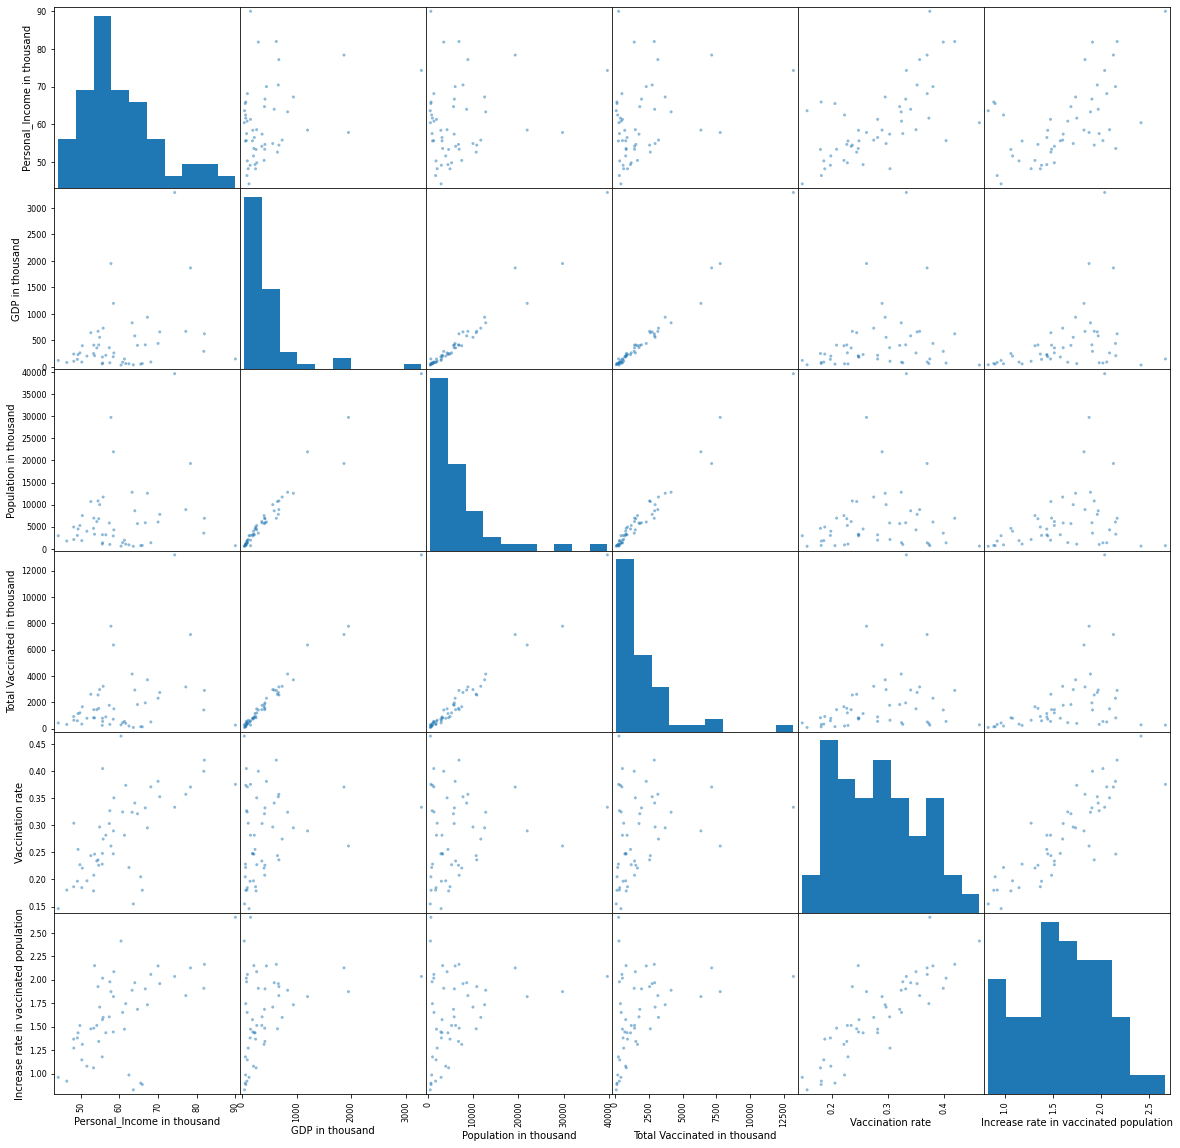

In [39]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
pd.plotting.scatter_matrix(df,figsize=(20,20),)

From the scatter diagram above, we can see that there are some trends between our data. It also looks like there are some outliers in the scatter plot of "GDP in thousand", "Population in thousand", "personal_income in thousand", and 'Total Vaccinated in thousand'. Hence, in order to further confirm the relationship between our variable, we can make outliers analysis for further data analysis and rearrange our data to check whether the data has outliers and decide whether we need to delete outliers if any. 

## Outlier analysis

First, we need to get a sense of what information we have in the df dataset.

In [40]:
df.describe()

,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,60.088627,443.130588,6496.932157,1900.006275,0.281612,1.619025
std,9.951744,575.011856,7428.830471,2364.218883,0.076545,0.426720
min,44.130000,36.090000,581.080000,89.990000,0.146200,0.825800
25%,53.440000,101.065000,1813.990000,482.340000,0.224150,1.354300
50%,57.790000,253.310000,4480.710000,1144.260000,0.281500,1.603900
75%,65.085000,572.865000,7658.520000,2583.460000,0.336950,1.941950
max,90.040000,3290.170000,39613.490000,13193.700000,0.464200,2.665100


In [ ]:
# 找了前四列的outlier，每个数据都不能删除，51个states不能少

### Personal_Income in thousand Outlier Analysis

Lower Outlier = 53.44 - 1.5 * (65.085 - 53.44) = 35.97 <br>
Higher Outlier = 65.085 + 1.5 * (65.085 - 53.44) = 88.55

Text(0.5, 1.0, 'Personal_income in thousand Outlier Analysis')

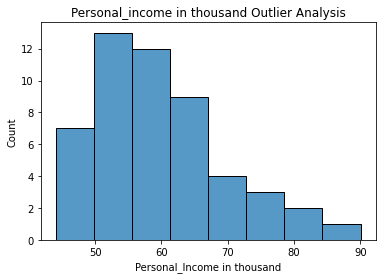

In [41]:
sns.histplot(x='Personal_Income in thousand',data=df).set_title("Personal_income in thousand Outlier Analysis")

In [42]:
df[(df['Personal_Income in thousand'] > 88.55) | (df['Personal_Income in thousand'] < 35.97)]

,State,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
7,DC,90.04,151.39,714.15,267.98,0.3752,2.6651


We find that there are an outlier in the diagram of "Personal_income in thousand Outlier Analysis" which is DC. However, we cannot eliminate this state's data because it is part of the 51 states in the United States. If we remove it, we will miss data for DC in the penetration analysis. Hence, we don't need to change our data here.

### GDP in thousand Outlier Analysis

Lower Outlier = 101.065 - 1.5 * (572.865 - 101.065) = -606.635<br>
Higher Outlier = 572.865 + 1.5 * (572.865 - 101.065) = 1280.565

Text(0.5, 1.0, 'GDP in thousand Outlier Analysis')

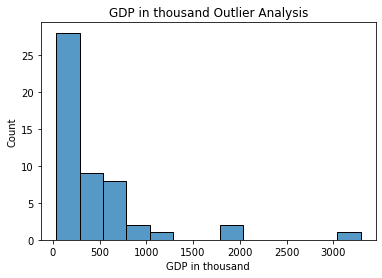

In [43]:
sns.histplot(x='GDP in thousand',data=df).set_title("GDP in thousand Outlier Analysis")

We found there are some states that had signifcantly more GDP than other states. We wanted to find which state there were.

In [44]:
df[df['GDP in thousand'] > 1280.565]

,State,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
4,CA,74.30,3290.17,39613.49,13193.70,0.3331,2.0343
34,NY,78.40,1868.22,19299.98,7146.14,0.3703,2.1255
43,TX,57.79,1950.36,29730.31,7778.51,0.2616,1.8727


We found the outlier in the diagram of "GDP in thousand Outlier Analysis" are CA, NY, TX (California, New York, Texas). However, we cannot eliminate these three states' data because these three states are parts of the 51 states in the United States. If we remove the GDP data for those three states, we will miss data for those three states in the penetration analysis. Hence, we don't need to change our data here.

### Population in thousand Outlier Analysis

Lower Outlier = 1813.99 - 1.5 * (7658.52 - 1813.995) = -6952.80<br>
Higher Outlier = 7658.52 + 1.5 * (7658.52 - 1813.99) = 16425.32

Text(0.5, 1.0, 'Population in thousand Outlier Analysis')

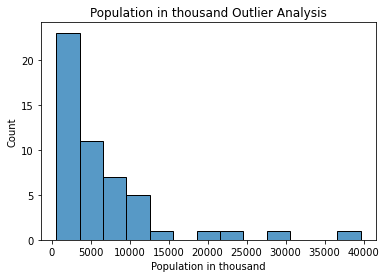

In [45]:
sns.histplot(x='Population in thousand',data=df).set_title("Population in thousand Outlier Analysis")

We found there are some states that had signifcantly more population than other states. We wanted to find which state there were.

In [46]:
df[df['Population in thousand'] > 16425.32]

,State,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
4,CA,74.30,3290.17,39613.49,13193.70,0.3331,2.0343
9,FL,58.44,1198.91,21944.58,6351.89,0.2895,1.8197
34,NY,78.40,1868.22,19299.98,7146.14,0.3703,2.1255
43,TX,57.79,1950.36,29730.31,7778.51,0.2616,1.8727


Again, we found the outlier in the diagram of "Population in thousand Outlier Analysis" are CA, FL, NY, and TX (California, Florida, New York, Texas). However, we cannot eliminate these four states' data because these four states are parts of the 51 states in the United States. If we remove the population data for those four states, we will miss data for those four states in the later analysis. So, we don't need to change our data here.

### Total Vaccinated in thousand Outlier Analysis

Lower Outlier = 482.34 - 1.5 * (2583.46 - 482.34) = -2669.34<br>
Higher Outlier = 2583.46 + 1.5 * (2583.46 - 482.34) = 5735.14

Text(0.5, 1.0, 'Total Vaccinated in thousand')

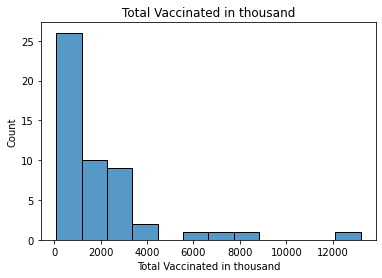

In [47]:
sns.histplot(x='Total Vaccinated in thousand',data=df).set_title("Total Vaccinated in thousand")

We found there is one state that had signifcantly more total vaccinated than other states. We wanted to find which state there was.

In [48]:
df[df['Total Vaccinated in thousand'] > 5735.14]

,State,Personal_Income in thousand,GDP in thousand,Population in thousand,Total Vaccinated in thousand,Vaccination rate,Increase rate in vaccinated population
4,CA,74.30,3290.17,39613.49,13193.70,0.3331,2.0343
9,FL,58.44,1198.91,21944.58,6351.89,0.2895,1.8197
34,NY,78.40,1868.22,19299.98,7146.14,0.3703,2.1255
43,TX,57.79,1950.36,29730.31,7778.51,0.2616,1.8727


We found the outlier in the diagram of "Total Vaccinated in thousand Outlier Analysis" are CA, FL, NY, and TX (California, Florida, New York, Texas). However, we cannot eliminate these four states' data because they are parts of the 51 states in the United States. If we remove the population data for these variables, we will miss data for these four states in the later analysis. So, we don't need to change our data here.

### Vaccination coverage rate and population
We considered population to be probably the confounding variable that may affect both a state's economy and Vaccination coverage rate. We wanted to determine if there was relationship between these variables.

Text(0.5, 1.0, 'Vaccination coverage rate and Population')

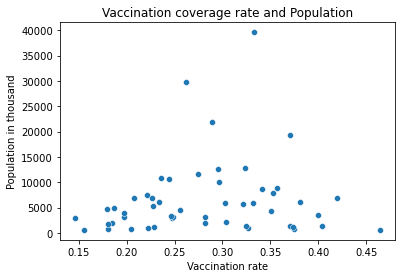

In [49]:
#draw the scatter plot
sns.scatterplot(x='Vaccination rate',y='Population in thousand',data=df).set_title("Vaccination coverage rate and Population")

It seems like the Vaccination coverage rate doesn't have a positive relationship with the population. In our diagram, all the points are hovering near the X-axis. Near the top of the graph, there is also an extreme outlier. From the above graph, we could initiatory get the conclusion that Total Vaccinated and population don't have a linear relationship.

### Relationship between Vaccination coverage rate and GDP

As we mentioned in purpose, we believed that state economie(GDP) is our confounding variable which may influence vaccination coverage by state. So we need to analyze whether there is a connection between these two data.

Text(0.5, 1.0, 'Vaccination coverage rate and GDP')

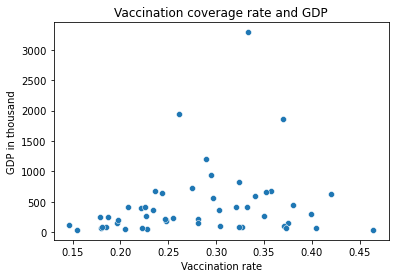

In [50]:
#using the catterplot for analyzing 
sns.scatterplot(x='Vaccination rate',y='GDP in thousand',data=df).set_title("Vaccination coverage rate and GDP")

It seems like the Vaccination coverage rate doesn't have a positive relationship with the GDP. In our diagram, all the points are hovering near the X-axis. Near the top of the graph, there is also an extreme outlier. From the above graph, we could initiatory get the conclusion that Total Vaccinated and GDP don't have a linear relationship. We will choose another angle to analyze whether Vaccination coverage rate has any relationship with the economy.

### Relationship between Vaccination coverage rate and Personal_Income

Personal income is one of the most important indicators of a state's economic performance. As we did in the previous step, we use scatter plot to analyze the relationship between the Vaccination coverage rate and Personal_Income.

Text(0.5, 1.0, 'Vaccination coverage rate and Personal_Income')

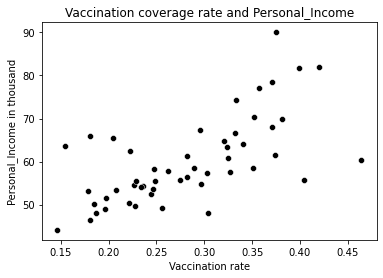

In [51]:
#using the catterplot for analyzing 
sns.scatterplot(x='Vaccination rate',y='Personal_Income in thousand',data=df,color="black").set_title("Vaccination coverage rate and Personal_Income")

From above graph, we find that there seems to be a positive linear relationship between the Vaccination coverage rate and Personal_income. In order to see their direct relationship more closely, we use the lmplot to draw the line of their relationship.

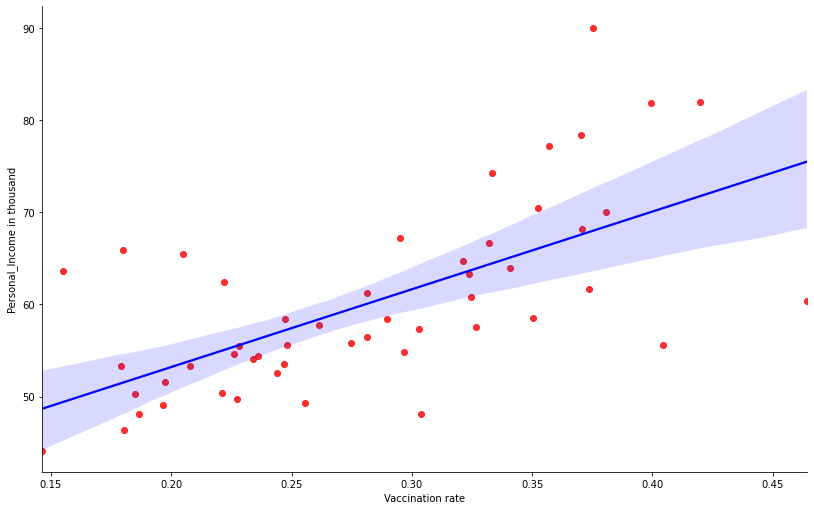

In [52]:
# Relationship between the Vaccination coverage rate and Personal_Income
sns.lmplot(
    x='Vaccination rate',
    y='Personal_Income in thousand',
    data = df,
    fit_reg=True,
    scatter_kws={'color':'red'},
    line_kws={'color':'blue'},
    aspect = 1.6,
    height= 7
)

From the new graph, we can see intuitively that here is a positive linear relationship between the Vaccination coverage rate and Personal_income. This also suggests that individual income has a positive impact on vaccination coverage rate in each state. Vaccination coverage rate increases when a state has high personal income.

## OLS Regression Model

In [53]:
# Linear regression analysis
dependent, predictors = patsy.dmatrices('Q("Personal_Income in thousand") ~ Q("Vaccination rate") + Q("Population in thousand")', df)
mode = sm.OLS(dependent, predictors)
result = mode.fit()

In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Q("Personal_Income in thousand")   R-squared:                       0.433
Model:                                          OLS   Adj. R-squared:                  0.410
Method:                               Least Squares   F-statistic:                     18.34
Date:                              Fri, 10 Dec 2021   Prob (F-statistic):           1.21e-06
Time:                                      16:52:53   Log-Likelihood:                -174.57
No. Observations:                                51   AIC:                             355.1
Df Residuals:                                    48   BIC:                             360.9
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      35.8800      4.144      8.658      0.000      27.547      44.213
Q("Vaccination rate")          82.5142     14.242      5.794      0.000      53.878     111.151
Q("Population in thousand")     0.0001      0.000      1.019      0.313      -0.000       0.000
==============================================================================
Omnibus:                        7.821   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.862
Skew:                           0.799   Prob(JB):                       0.0324
Kurtosis:                       3.821   Cond. No.                     1.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the table we can see that the P value is 0.000 which is lower than all significance levels,  it indicates there is a positive linear relationship between the personal income and vaccination rate. We can also find out the P-value for Population is 0.313. It is much larger than 0.05, making us fail to reject the null hypothesis. Therefore, we can state that there is no relation between vaccination rate and population.

After we analyzed the relationship between Vaccination coverage rate and economy, we get that there is a postive linear relationship between the Vaccination coverage rate and Personal_income. We also want to analyze the relationship between Increase rate in vaccinated population and economy.

### Increase rate in vaccinated population and population
We considered population to be also probably the confounding variable that may affect both a state's economy and Increase rate in vaccinated population. We wanted to determine if there was relationship between these variables.

Text(0.5, 1.0, 'Increase rate in vaccinated population and Population')

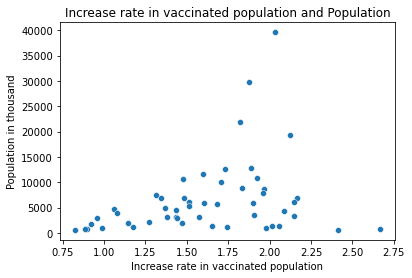

In [55]:
#draw the scatter plot
sns.scatterplot(x='Increase rate in vaccinated population',y='Population in thousand',data=df).set_title("Increase rate in vaccinated population and Population")

It seems like Increase rate in vaccinated population doesn't have a positive relationship with the population. In our diagram, all the points are hovering near the X-axis. Near the top of the graph, there is also an extreme outlier. From the above graph, we could initiatory get the conclusion that Increase rate in vaccinated population and population don't have a linear relationship.

### Relationship between Increase rate in vaccinated population and GDP

In this section, we will try to analyze the relationship between Increase rate in vaccinated population and GDP.

Text(0.5, 1.0, 'Increase rate in vaccinated population and GDP')

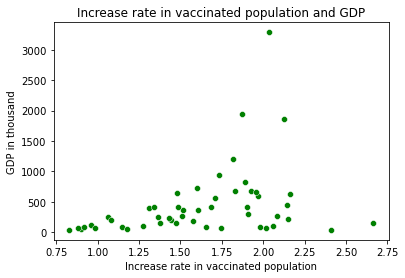

In [56]:
#using the catterplot for analyzing 
sns.scatterplot(x='Increase rate in vaccinated population',y='GDP in thousand',data=df,color="green").set_title("Increase rate in vaccinated population and GDP")

It seems like the increase rate in vaccinated population doesn't have a relationship with the GDP. In our diagram, all the points are hovering near the X-axis. Near the top of the graph, there is also an extreme outlier. From the above graph, we could initiatory get the conclusion that the increase rate in vaccinated population and GDP don't have a linear relationship. We will choose another angle to analyze whether Increase rate in vaccinated population has any relationship with the economy.

### Relationship between Increase rate in vaccinated population and Personal_Income

As we did in the previous step, we use scatter plot to analyze the relationship between the Increase rate in vaccinated population and Personal_income.

Text(0.5, 1.0, 'Increase rate in vaccinated population and Personal_Income')

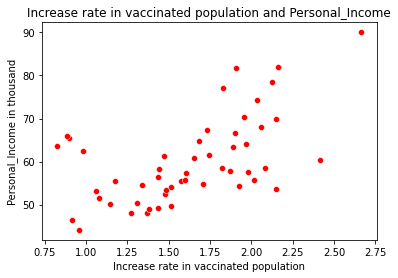

In [57]:
#using the catterplot for analyzing 
sns.scatterplot(x='Increase rate in vaccinated population',y='Personal_Income in thousand',data=df,color="red").set_title("Increase rate in vaccinated population and Personal_Income")

From above graph, we find that there is a positive linear relationship between the Increase rate in vaccinated population and Personal_Income. In order to see their direct relationship more closely, we use the lmplot to draw the line of their relationship.

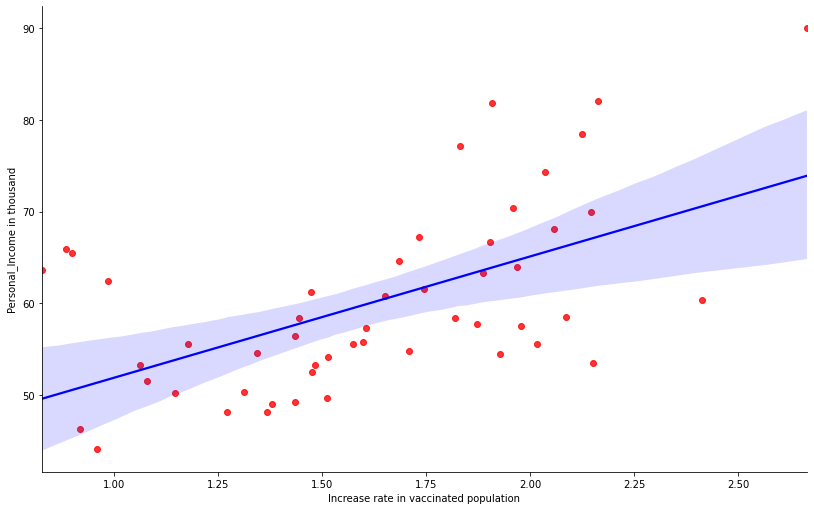

In [58]:
# Relationship between the Increase rate in vaccinated population and Personal_Income
sns.lmplot(
    x='Increase rate in vaccinated population',
    y='Personal_Income in thousand',
    data = df,
    fit_reg=True,
    scatter_kws={'color':'red'},
    line_kws={'color':'blue'},
    aspect = 1.6,
    height= 7
)

From the new graph, we can see intuitively that here is a positive linear relationship between the Increase rate in vaccinated population and Personal_income. This also suggests that individual income has a positive impact on Increase rate in vaccinated population in each state. Increase rate in vaccinated population increases when a state has high personal income.

## OLS Regression Model

In [59]:
# Linear regression analysis
dependent, predictors = patsy.dmatrices('Q("Personal_Income in thousand") ~ Q("Increase rate in vaccinated population") + Q("Population in thousand")', df)
mode = sm.OLS(dependent, predictors)
result = mode.fit()

In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Q("Personal_Income in thousand")   R-squared:                       0.321
Model:                                          OLS   Adj. R-squared:                  0.293
Method:                               Least Squares   F-statistic:                     11.36
Date:                              Fri, 10 Dec 2021   Prob (F-statistic):           9.15e-05
Time:                                      16:52:54   Log-Likelihood:                -179.17
No. Observations:                                51   AIC:                             364.3
Df Residuals:                                    48   BIC:                             370.1
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      38.7768      4.650      8.339      0.000      29.427      48.127
Q("Increase rate in vaccinated population")    13.0174      2.903      4.485      0.000       7.181      18.853
Q("Population in thousand")                  3.638e-05      0.000      0.218      0.828      -0.000       0.000
==============================================================================
Omnibus:                        5.058   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                4.926
Skew:                           0.720   Prob(JB):                       0.0852
Kurtosis:                       2.504   Cond. No.                     4.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the table we can see that the P value for Increase rate in vaccinated population is 0.000 which is lower than all significance levels,  it indicates there is a postive linear relationship between the personal income and vaccination rate. We can also find out the P-value for Populaion is 0.828. It is much larger than 0.05, making us fail to reject the null hypothesis. Therefore, we can state that there is no relation between Increase rate in vaccinated population and population.

After we anlayzed the relationship between Increase rate in vaccinated population and econmy, we get that there is a postive linear relationship between Increase rate in vaccinated population and Personal_income.

# Ethics & Privacy

Our research question is to check if each state is contributing to the spread of COVID-19. In terms of data, we will be collecting from the government’s site, so we can guarantee the accuracy of it. Our goal is to focus on a specific season for data analysis, which will include information about the number of people vaccinated each date for that whole season, the GPD, and personal income. There might be bias here since it is based on a seasonal term, especially with GDP and personal income. For example, in sales services there are busy and non-busy seasons, meaning it affects the GDP accuracy when we only look at one. Moreover, people might prefer getting vaccinated at a specific season than others, hence will create a difference. Another bias is that we don’t have many research data to choose. Since the vaccine only became available in March this year, we had to select data from march onward for our research analysis. And because the government did not release GDP per person for the third quarter of this year when we did our survey, we have a narrower range of data to choose from. Finally, we only chose the data of the second quarter of 2021 as our research data. However, we think our research is still very necessary. Data from early vaccine research can help governments choose the number and region which vaccines need to be spread.
To avoid any biases we will bring our data in a broader view because there isn’t any other season for comparisons. Furthermore, due to sample sizes and variation, there may be bias in a specific state. If we are collecting 1000 samples from both California and Michigan, then the sample will better represent Michigan than California because California has a bigger population. Therefore, we hope to be consistent with all samples and be as balanced as possible. There is also the problem of sample size mentioned above. The data we have so far is still sparse. To better improve our research and improve the accuracy of our research results, we can carry out more in-depth investigation and research. We can run the same survey again next March when the problem will be gone.

In order to prevent the invasion of personal privacy, we selected all data from official government websites. The data is publicly available, which has been publicized by the Bureau of Economic Analysis(BEA) and Centers for Disease Control and Prevention(CDC). In the process of data cleaning and data analysis, we did not select any data of each body. This is also a good way to prevent information leakage.

# Conclusion & Discussion

After deciding the final version of the hypothesis, our first step was to collect data and do data cleaning for our dataset  in order to perform data analysis logically and tightly. We collected four main dataset, they are vaccination rate, personal income, GDP and  increase rate of the vaccinated population, and one ancillary dataset to indicate the 51 states correctly. In order to find out the dataset we need, we extracted the number of vaccinations by state. And then, filtering the personal income data to get the data from 04/01/2021 to 06/30/2021 in the consideration of the limitation on official state personal income data integrity. After we extract the columns of value we need and renaming them, we calculated the vaccination rate of each state. Moreover, we combined all these data to form a new dataset named df.

In the step of the data analysis, we found that personal income and vaccination rates showed a positive linear relationship. We used the matrix function to draw a scatter plot and used lmplot to add an upward line to the scatter plot to show the upward trend. However, there is no linear relationship between GDP and vaccination rates. We inferring this phenomenon is probably due to the fact that GDP contains too much non-personal related data, which is the market value of all final products produced by economic activity in a region at a given period. The reason for the correlation between personal income and vaccination rates is that both vaccination and income are related to individuals, and no unrelated data such as market value are included. We also found that population is a confounding variable because it is not related to the vaccination rate or the increase rate of the vaccinated population. The reason we still add population in our OLS regression model is because population contains many other factors that might affect personal income such as demographics and the age distribution. 

To sum up, even though our project was able to conclude that personal income and vaccination rates have a positive relationship, we still need more information to make a more complete statement. Since we only collected two months of data and covid-19 is the new disease we are facing, vaccination policy is also changing. Variables like government policy, individual’s age, and much more information are needed to be included to make a complete statement.


# Team Contributions

Jianfan Huo: Topic Choosing, Data cleaning, Data Analysis, Data description, Edit cleaning and analysis <br>
Yunhao Du: Topic Choosing, Data obtain, Data cleaning, Data Analysis, Data description, Video powerpoint <br>
Yixin Jiang: Topic Choosing, Data obtain, Data cleaning, Data Analysis, Data description, Video content <br>
Yixiao An: Background, Data description, Conclusion & Discussion, Video <br>
Celine Zhao: Overview, Ethics&Privacy, Team Expectations